<a href="https://colab.research.google.com/github/MannatPruthi/TOPSIS-on-Text-Summarization/blob/main/TOPSIS_Text_Summarization_102117185.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing different packages using pip

In [ ]:
!pip install transformers

In [100]:
!pip install topsis-mannat-102117185

In [ ]:
!pip install torch

In [ ]:
!pip install tensorflow

In [ ]:
!pip install nltk

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install pycider

ERROR: Could not find a version that satisfies the requirement pycider (from versions: none)
ERROR: No matching distribution found for pycider


## Summarization of text using different models

In [ ]:
text = input("Enter the text which you want to summarize : ")

Enter the text which you want to summarize : 'Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps. The batting side scores runs by striking the ball bowled at one of the wickets with the bat and then running between the wickets, while the bowling and fielding side tries to prevent this (by preventing the ball from leaving the field, and getting the ball to either wicket) and dismiss each batter (so they are "out"). Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side either catching the ball after it is hit by the bat, but before it hits the ground, or hitting a wicket with the ball before a batter can cross the crease in front of the wicket. When ten batters have been dismissed, the innings ends and the teams swap roles. The game is adjudicated by two umpir

In [ ]:
text

'Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps. The batting side scores runs by striking the ball bowled at one of the wickets with the bat and then running between the wickets, while the bowling and fielding side tries to prevent this (by preventing the ball from leaving the field, and getting the ball to either wicket) and dismiss each batter (so they are "out"). Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side either catching the ball after it is hit by the bat, but before it hits the ground, or hitting a wicket with the ball before a batter can cross the crease in front of the wicket. When ten batters have been dismissed, the innings ends and the teams swap roles. The game is adjudicated by two umpires, aided by a third umpire and match referee

## Text Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_text_for_summarization(text, retain_stopwords=None):
    # Lowercasing
    text = text.lower()
    # Sentence Tokenization
    sentences = sent_tokenize(text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords excluding those specified in retain_stopwords
    stop_words = set(stopwords.words('english'))
    if retain_stopwords:
        stop_words -= set(retain_stopwords)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into sentences
    preprocessed_text = ' '.join(words)
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
text = preprocess_text_for_summarization(text,retain_stopwords=['a','is','the'])

In [ ]:
text

'cricket is a batandball game played two team eleven player a field the centre is a yard metre pitch a wicket end comprising two bail balanced three stump the batting side score run striking the ball bowled one the wicket the bat running the wicket the bowling fielding side try prevent preventing the ball leaving the field getting the ball either wicket dismiss batter mean dismissal include bowled the ball hit the stump dislodges the bail the fielding side either catching the ball is hit the bat hit the ground hitting a wicket the ball a batter cross the crease front the wicket ten batter dismissed the inning end the team swap role the game is adjudicated two umpire aided a third umpire match referee international match communicate two offfield scorer record the match statistical information form cricket range twenty also known team batting a single inning over a set fair opportunity the batting team score the game generally lasting three four hour test match played five day traditiona

### Model - 1 => bart-large-cnn
### https://huggingface.co/facebook/bart-large-cnn

In [ ]:
from transformers import pipeline
summarizer = pipeline('summarization',model='facebook/bart-large-cnn')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
summarized_text1 = summarizer(text,max_length=130,min_length=30,do_sample = False)

In [ ]:
print(summarized_text1[0]['summary_text'])

Cricket is a batandball game played two team eleven player a field the centre is a yard metre pitch a wicket end comprising two bail balanced three stump the batting side score run striking the ball bowled one the wicket the bat running the wickets the bowling fielding side try prevent preventing the ball leaving the field getting the ball either wicket dismiss batter mean dismissal include bowled the ball hit the stump dislodges the bail. The game governing body is the international cricket council icc member twelve full member play test match.


### Model - 2 => MEETING_SUMMARY
### https://huggingface.co/knkarthick/MEETING_SUMMARY

In [ ]:
from transformers import pipeline
summarizer1 = pipeline("summarization", model="knkarthick/MEETING_SUMMARY")

config.json:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
summarized_text2 = summarizer1(text,max_length=130,min_length=90,do_sample = False)

In [ ]:
summarized_text2[0]['summary_text']

'Cricket is played in South East England, Australia, New Zealand and in the West Indies. The game governing body is the International Cricket Council (ICC). The game rules are written by umpires and scorers. The cricket ball is hard solid spheroid made compressed leather with a cork core layered tightly wound string. The basic kit for cricket is white with a club colour added. The successful team is Australia.  '

### Model - 3 => t5-base-fr-sum-cnndm
### https://huggingface.co/plguillou/t5-base-fr-sum-cnndm

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
tokenizer = T5Tokenizer.from_pretrained("plguillou/t5-base-fr-sum-cnndm")
model = T5ForConditionalGeneration.from_pretrained("plguillou/t5-base-fr-sum-cnndm")

tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
input_ids = tokenizer.encode(text, return_tensors="pt", max_length=1024, truncation=True)
summary_ids = model.generate(input_ids, max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
summarized_text3 = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
summarized_text3

'Cricket is a two team cricket game played two team eleven player a field the centre is a yard metre pitch a wicket end comprising two bail balanced three stump the batting side score run striking the ball bowled one the wicket the bat running the wicket the bowling fielding side try prevent preventing the ball leaving the field getting the ball either wicket dismissal include bowled the ball hit the stump dislodges the bail the fielding side either catching the ball is hit the ball hit the ground hitting a wicket ten batter dismissed the inning end the team swap role the game is adjudicated two umpire aided a third umpire match refere'

### Model - 4 => text_summarization
### https://huggingface.co/Falconsai/text_summarization

In [ ]:
from transformers import pipeline
summarizer2 = pipeline("summarization", model="Falconsai/text_summarization")

config.json:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [ ]:
summarized_text4 = summarizer2(text,max_length=130,min_length=90,do_sample = False)

In [ ]:
summarized_text4[0]['summary_text']

'cricket is played two team eleven player a field the centre is a yard metre pitch a wicket end comprising two bail balanced three stump the batting side score run striking the ball bowled one the wicket the bowling fielding side try prevent preventing the ball leaving the field getting the ball either wicket dismiss batter mean dismissal include bowles the ball hit the ground hitting a batter cross the crease front the wicket ten batter dismissed the inning end the team swap role the game is adjudicated two umpire'

### Model - 5 => led-large-book-summary
### https://huggingface.co/pszemraj/led-large-book-summary

In [ ]:
import torch
from transformers import pipeline
hf_name = 'pszemraj/led-large-book-summary'
summarizer3 = pipeline(
    "summarization",
    hf_name,
    device=0 if torch.cuda.is_available() else -1,
)

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.84G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
summarized_text5 = summarizer3(text,min_length = 90,
                               max_length = 200,
                               no_repeat_ngram_size=3,
                               encoder_no_repeat_ngram_size=3,
                               repetition_penalty=3.5,
                               num_beams=4,
                               early_stopping=True)

In [ ]:
summarized_text5[0]['summary_text']

"In this chapter we learn about cricket, the game played between batsmen and bowlers. We also learn about the rules of the game and its governing body, the International Cricket Council. What is cricket? Well, it's basically a bat and ball game played on a cricket pitch with two umpires and three stump players. The playing takes place in five day test match-like contests with twenty known countries across the world. Here are some facts about cricket: balls are made of compressed leather, the batting teams wear protective equipment to prevent injury due to the impact of the ball on the ground, the breaking point is the ball struck by the bat, the fielding team tries to stop the ball from getting away from the field, and so on. It is played in many countries throughout the world but the most famous country is Australia which has won the most prestigious tournament, the One Day Internationals."

### BLEU Score

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
def calculate_bleu_score(reference, hypothesis):
    reference_tokens = [reference.split()]
    hypothesis_tokens = hypothesis.split()
    smoothing_function = SmoothingFunction().method1
    bleu_score = sentence_bleu(reference_tokens, hypothesis_tokens, smoothing_function=smoothing_function)
    return bleu_score

In [ ]:
bleu_score1 = calculate_bleu_score(text,summarized_text1[0]['summary_text'])

In [ ]:
bleu_score1

0.07525678788260079

In [ ]:
bleu_score2 = calculate_bleu_score(text,summarized_text2[0]['summary_text'])

In [ ]:
bleu_score2

0.005524193328737768

In [ ]:
bleu_score3 = calculate_bleu_score(text,summarized_text3)

In [ ]:
bleu_score3

0.14321374604701642

In [ ]:
bleu_score4 = calculate_bleu_score(text,summarized_text4[0]['summary_text'])

In [ ]:
bleu_score4

0.0698426535345447

In [ ]:
bleu_score5 = calculate_bleu_score(text,summarized_text5[0]['summary_text'])

In [ ]:
bleu_score5

0.0037450848950041507

In [ ]:
bleu_score = [bleu_score1,bleu_score2,bleu_score3,bleu_score4,bleu_score5]

In [ ]:
bleu_score

[0.07525678788260079,
 0.005524193328737768,
 0.14321374604701642,
 0.0698426535345447,
 0.0037450848950041507]

### F1 Score

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.metrics import precision, recall, f_measure
def calculate_f1_score(reference, hypothesis):
    reference_tokens = set(word_tokenize(reference))
    hypothesis_tokens = set(word_tokenize(hypothesis))
    precision_score = precision(reference_tokens, hypothesis_tokens)
    recall_score = recall(reference_tokens, hypothesis_tokens)
    f1_score_result = f_measure(reference_tokens, hypothesis_tokens)
    return f1_score_result

In [ ]:
f1_score1 = calculate_f1_score(text,summarized_text1[0]['summary_text'])

In [ ]:
f1_score1

0.4876033057851239

In [ ]:
f1_score2 = calculate_f1_score(text,summarized_text2[0]['summary_text'])

In [ ]:
f1_score2

0.22978723404255322

In [ ]:
f1_score3 = calculate_f1_score(text,summarized_text3)

In [ ]:
f1_score3

0.48535564853556484

In [ ]:
f1_score4 = calculate_f1_score(text,summarized_text4[0]['summary_text'])

In [ ]:
f1_score4

0.4745762711864407

In [ ]:
f1_score5 = calculate_f1_score(text,summarized_text5[0]['summary_text'])

In [ ]:
f1_score5

0.2508710801393728

In [ ]:
f1_score = [f1_score1,f1_score2,f1_score3,f1_score4,f1_score5]

In [ ]:
f1_score

[0.4876033057851239,
 0.22978723404255322,
 0.48535564853556484,
 0.4745762711864407,
 0.2508710801393728]

### ROUGE-1 Score

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.util import ngrams
import re
def calculate_rouge_n(reference, hypothesis, n=1):
    reference_tokens = re.findall(r'\b\w+\b', reference.lower())
    hypothesis_tokens = re.findall(r'\b\w+\b', hypothesis.lower())
    reference_ngrams = list(ngrams(reference_tokens, n))
    hypothesis_ngrams = list(ngrams(hypothesis_tokens, n))
    overlap = len(set(reference_ngrams) & set(hypothesis_ngrams))
    precision = overlap / len(hypothesis_ngrams) if len(hypothesis_ngrams) > 0 else 0
    recall = overlap / len(reference_ngrams) if len(reference_ngrams) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score

In [ ]:
rouge1_score1 = calculate_rouge_n(text,summarized_text1[0]['summary_text'])

In [ ]:
rouge1_score1

0.2822966507177033

In [ ]:
rouge1_score2 = calculate_rouge_n(text,summarized_text2[0]['summary_text'])

In [ ]:
rouge1_score2

0.18781725888324874

In [ ]:
rouge1_score3 = calculate_rouge_n(text,summarized_text3)

In [ ]:
rouge1_score3

0.26423690205011385

In [ ]:
rouge1_score4 = calculate_rouge_n(text,summarized_text4[0]['summary_text'])

In [ ]:
rouge1_score4

0.26987951807228916

In [ ]:
rouge1_score5 = calculate_rouge_n(text,summarized_text5[0]['summary_text'])

In [ ]:
rouge1_score5

0.16977225672877846

In [ ]:
rouge1_score = [rouge1_score1,rouge1_score2,rouge1_score3,rouge1_score4,rouge1_score5]

In [ ]:
rouge1_score

[0.2822966507177033,
 0.18781725888324874,
 0.26423690205011385,
 0.26987951807228916,
 0.16977225672877846]

### ROUGE - 2 Score

In [ ]:
rouge2_score1 = calculate_rouge_n(text,summarized_text1[0]['summary_text'],n=2)

In [ ]:
rouge2_score1

0.4134615384615385

In [ ]:
rouge2_score2 = calculate_rouge_n(text,summarized_text2[0]['summary_text'],n=2)

In [ ]:
rouge2_score2

0.16836734693877553

In [ ]:
rouge2_score3 = calculate_rouge_n(text,summarized_text3,n=2)

In [ ]:
rouge2_score3

0.4302059496567506

In [ ]:
rouge2_score4 = calculate_rouge_n(text,summarized_text4[0]['summary_text'],n=2)

In [ ]:
rouge2_score4

0.40193704600484265

In [ ]:
rouge2_score5 = calculate_rouge_n(text,summarized_text5[0]['summary_text'],n=2)

In [ ]:
rouge2_score5

0.09147609147609147

In [ ]:
rouge2_score = [rouge2_score1,rouge2_score2,rouge2_score3,rouge2_score4,rouge2_score5]

In [ ]:
rouge2_score

[0.4134615384615385,
 0.16836734693877553,
 0.4302059496567506,
 0.40193704600484265,
 0.09147609147609147]

### METEOR Score

In [ ]:
import nltk
from nltk.translate.meteor_score import meteor_score
def calculate_meteor_score(reference, hypothesis):
    reference_tokens = nltk.word_tokenize(reference)
    hypothesis_tokens = nltk.word_tokenize(hypothesis)
    meteor_score_value = meteor_score([reference_tokens], hypothesis_tokens)
    return meteor_score_value

In [ ]:
meteor_score1 = calculate_meteor_score(text,summarized_text1[0]['summary_text'])

In [ ]:
meteor_score1

0.22055549047127906

In [ ]:
meteor_score2 = calculate_meteor_score(text,summarized_text2[0]['summary_text'])

In [ ]:
meteor_score2

0.16372591202217887

In [ ]:
meteor_score3 = calculate_meteor_score(text,summarized_text3)

In [ ]:
meteor_score3

0.26311687672446565

In [ ]:
meteor_score4 = calculate_meteor_score(text,summarized_text4[0]['summary_text'])

In [ ]:
meteor_score4

0.2155428618225744

In [ ]:
meteor_score5 = calculate_meteor_score(text,summarized_text5[0]['summary_text'])

In [ ]:
meteor_score5

0.1855950314171489

In [ ]:
meteor_score = [meteor_score1,meteor_score2,meteor_score3,meteor_score4,meteor_score5]

In [ ]:
meteor_score

[0.22055549047127906,
 0.16372591202217887,
 0.26311687672446565,
 0.2155428618225744,
 0.1855950314171489]

## Creating a dataset now with the model names and different scores

In [ ]:
import pandas as pd
model_names = ["bart-large-cnn", "MEETING_SUMMARY", "t5-base-fr-sum-cnndm", "text_summarization", "led-large-book-summary"]
data = {
    "Model Name": model_names,
    "BLEU SCORE": bleu_score,
    "F1 SCORE": f1_score,
    "ROUGE-1 SCORE": rouge1_score,
    "ROUGE-2 SCORE": rouge2_score,
    "METEOR SCORE": meteor_score
}
df = pd.DataFrame(data)

In [ ]:
df

,Model Name,BLEU SCORE,F1 SCORE,ROUGE-1 SCORE,ROUGE-2 SCORE,METEOR SCORE
0,bart-large-cnn,0.075257,0.487603,0.282297,0.413462,0.220555
1,MEETING_SUMMARY,0.005524,0.229787,0.187817,0.168367,0.163726
2,t5-base-fr-sum-cnndm,0.143214,0.485356,0.264237,0.430206,0.263117
3,text_summarization,0.069843,0.474576,0.269880,0.401937,0.215543
4,led-large-book-summary,0.003745,0.250871,0.169772,0.091476,0.185595


In [ ]:
df.to_csv('input_to_topsis.csv', index=False)

## Getting to know the impacts of the score
### BLEU SCORE - postive
### F1 SCORE - positive
### ROUGE-1 SCORE - positive
### ROUGE-2 SCORE - positive
### METEOR SCORE - positive

## Applying TOPSIS on the dataframe now.

In [96]:
!py -m topsis.__main__ "/content/102117185-data.csv" "2,2,3,3,4" "-,+,-,+,-" "/content/102117185-result-2.csv"

/bin/bash: line 1: py: command not found


In [98]:
df_topsis = pd.read_csv("/content/102117185-result-2.csv")

In [99]:
df_topsis

,Model,Correlation,R2,RMSE,Accuracy,Topsis Score,Rank
0,M1,0.79,0.62,1.25,60.89,0.709209,2
1,M2,0.66,0.44,2.89,63.07,0.199541,5
2,M3,0.56,0.31,1.57,62.87,0.559126,3
3,M4,0.82,0.67,2.68,70.19,0.390100,4
4,M5,0.75,0.56,1.30,80.39,0.797680,1


### Hence we can conclude that best model is t5-base-fr-sum-cnndm as it is having the highest TOPSIS Score.

# Visualization through Bar Graph

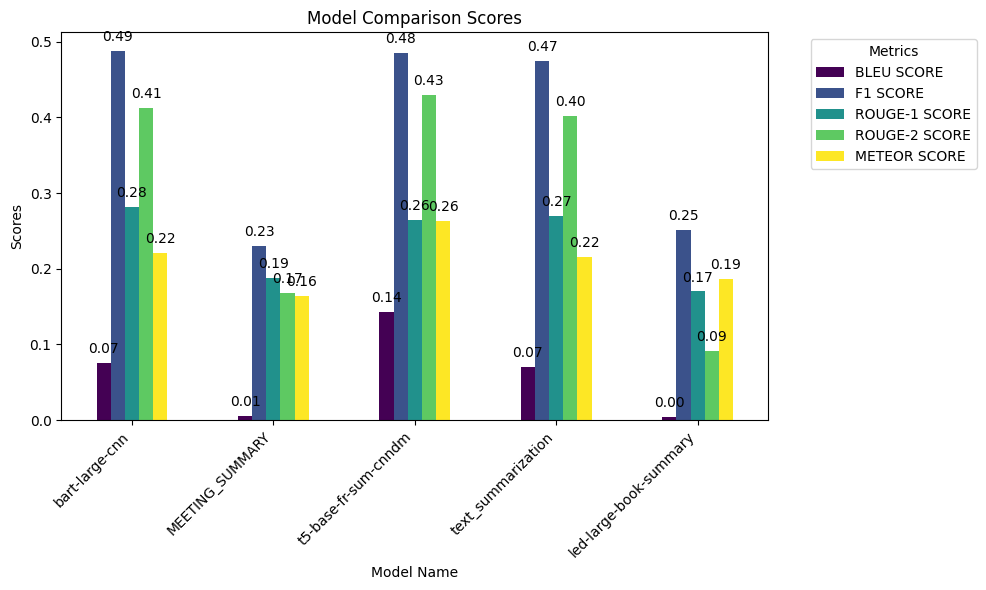

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with your model comparison data
# Replace the following line with your actual DataFrame
data = {
    'Model Name': ['bart-large-cnn', 'MEETING_SUMMARY', 't5-base-fr-sum-cnndm', 'text_summarization', 'led-large-book-summary'],
    'BLEU SCORE': [0.075257, 0.005524, 0.143214, 0.069843, 0.003745],
    'F1 SCORE': [0.487603, 0.229787, 0.485356, 0.474576, 0.250871],
    'ROUGE-1 SCORE': [0.282297, 0.187817, 0.264237, 0.269880, 0.169772],
    'ROUGE-2 SCORE': [0.413462, 0.168367, 0.430206, 0.401937, 0.091476],
    'METEOR SCORE': [0.220555, 0.163726, 0.263117, 0.215543, 0.185595]
}

df = pd.DataFrame(data)

# Set the Model Name as the index for better x-axis labels
df.set_index('Model Name', inplace=True)

# Round off the values to two decimal places
df = df.round(3)

# Plot the bar chart
ax = df.plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Set labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Comparison Scores')

# Show the legend
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()